In [0]:
import warnings
warnings.filterwarnings('ignore')

!pip install -q keras

import os
import pandas as pd
import numpy as np

from google.colab import files

from sklearn.utils import shuffle
from keras.utils import to_categorical

import matplotlib.pyplot as plt

from pylab import rcParams

### 將本機端的 `pkgo_nyc_5class.csv.bz2` 上傳到 colab

In [0]:
if not os.path.exists('pkgo_nyc_5class.csv.bz2'):
    uploaded = files.upload()

### 讀取 `pkgo_nyc_5class.csv.bz2`

In [0]:
pkgo = pd.read_csv('pkgo_nyc_5class.csv.bz2')

### 建構模型

In [0]:
''' Import keras to build a DL model '''
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras.optimizers import SGD, RMSprop, Adam

def build_model(X):
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[-1]))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(5))
    model.add(Activation('softmax'))
    return model

In [0]:
def Xy_split(pkgo):
    num_cols = pkgo.shape[1]
    X = pkgo.iloc[:, :num_cols-1]
    y = pkgo['class']
    
    # 型別轉換，確保資料型態正確
    X = X.astype(np.float32)
    y = y.astype(np.int)
    
    # 對 y 做 one-hot encoding
    y = to_categorical(y)
    
    # 打亂資料集
    X, y = shuffle(X, y)
    
    return X, y

X, y = Xy_split(pkgo)

## Overfitting

In [0]:
model = build_model(X)
optim = Adam(lr=10e-5)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

batch_size=32
epochs = 100

history = model.fit(X, y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    shuffle=True,
                    validation_split=0.1)

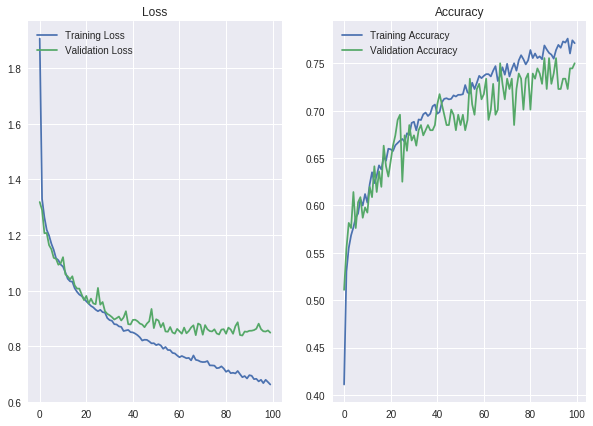

In [10]:
''' Visualize the training/validation loss and training/validation accuracy'''
rcParams['figure.figsize'] = 10, 7

loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

acc = history.history.get('acc')
val_acc = history.history.get('val_acc')
    
plt.figure(0)

plt.subplot(121)

plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Loss')


plt.subplot(122)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')

plt.show()